# Simulating Neurons as Poisson Processes

In [2]:
import quantities as pq
import numpy as np
from matplotlib import pyplot as plt
from neo.core import AnalogSignal
from elephant.spike_train_generation import StationaryPoissonProcess
%matplotlib inline
from elephant.statistics import isi

In [3]:
from scipy.stats import poisson, expon
from scipy import interpolate


class utils:
    @staticmethod
    def plot_poisson_distribution(rate, duration, x_range):
        bins = np.arange(x_range[0], x_range[1] + 1)
        mu = rate * duration
        prob = poisson.pmf(k=bins, mu=mu)
        plt.plot(bins, prob, color="black", marker="o", linestyle="None")

        f = interpolate.interp1d(bins, prob, kind="cubic")
        bins = np.arange(x_range[0], x_range[1], 0.1)

        plt.plot(bins, f(bins), color="black")
        plt.xlabel("Number of Spikes")
        plt.ylabel("Probability")

    @staticmethod
    def plot_exponential_distribution(rate, x_range):
        t = np.linspace(x_range[0], x_range[1], 1000)
        pdf_values = expon.pdf(t, scale=1 / rate)
        plt.plot(t, pdf_values, color="black")

## 1 Working whith Physical Quantities

| Code | Description |
|------------------------------------|------------------------------------|
| `freq = 2 * pq.Hz` | Define a quantity of 2 Hertz and assign it to the variable `freq` |
| `time = 2500 * pq.ms` | Define a quantity of 2500 milliseconds and assign it to the variable `time` |
| `time.units` | Get the unit of `time` |
| `time.magnitude` | Get the magnitude of `time` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 1**</span> Create a variable
called `firing_rate` and assign it the value **5 Hertz**.

In [4]:
firing_rate = 5 * pq.Hz

<span class="theorem-title">**Exercise 2**</span> Create a variable
called `t_start` and assign it the value **100 milliseconds**.

In [5]:
t_start = 100 * pq.ms

<span class="theorem-title">**Exercise 3**</span> Create a variable
called `t_stop` and assign it the value **3 seconds**

In [6]:
t_stop = 3 * pq.s

<span class="theorem-title">**Exercise 4**</span> Subtract t_start from
t_stop and assign the result to a variable called `duration`. Print the
magnitude and unit of that variable.

In [7]:
duration = t_stop - t_start
print(duration.magnitude, duration.units)

2.9 1.0 s

<span class="theorem-title">**Exercise 5**</span> Try adding the
variables `firing_rate` and `duration`. What error message do you
observe?

In [8]:
firing_rate+duration

## 2 Simulating Randomly Firing Neurons with Stationary Poisson Processes

| Code | Description |
|------------------------------------|------------------------------------|
| `neuron = StationarPoissonProcess(rate, t_stop=1*pq.s)` | Simulate a Poisson `neuron` with an average firing `rate` that is active from 0 to `1` seconds |
| `st = neuron.generate_spike_train()` | Generate a spiketrain `st` from the simulated `neuron` |
| `st.times` | Acceess the `.times` of the generated spikes in the spike train `st` |
| `sts = neuron.generate_n_spiketrains(n)` | Generate a list `sts` with `n` spiketrains from the simulated `neuron` |
| `spike_times = [st.times for st in sts]` | Get the `spike_times` for very spike train `st` in the list `sts` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 1**</span> Simulate a neuron as a
`StationaryPoissonProcess` with a `rate` of **0.5 Hz** that is active
for **10 s**.

``` python
rate = 0.5 * pq.Hz
t_stop = 10 * pq.s
neuron = StationaryPoissonProcess(rate=rate, t_stop=t_stop)
```

<span class="theorem-title">**Example 2**</span> Generate a spike train
from the simulated Poisson neuron, then print the number of generated
spikes and the spike `.times`.

``` python
st = neuron.generate_spiketrain()
print(f"generated {len(st.times)} spikes:")
st.times
```

    generated 3 spikes:

    array([0.78741921, 4.66830311, 7.90293071]) * s

<span class="theorem-title">**Exercise 6**</span> Simulate a neuron as a
`StationaryPoissonProcess` with a `rate` of **10 Hz** that lasts **0.5
s**. Then, generate a spike train from that neuron and print the number
of generated spikes and the spike times

``` python
rate = 10 * pq.Hz
t_stop = 0.5 * pq.s
neu = StationaryPoissonProcess(rate=rate, t_stop=t_stop)
st = neu.generate_spiketrain()
print(f"generated {len(st.times)} spikes:")
st.times
```

    generated 6 spikes:

    array([0.02529154, 0.13985407, 0.26026115, 0.3836213 , 0.42270565,
           0.45908391]) * s

<span class="theorem-title">**Exercise 7**</span> Simulate a neuron as a
`StationaryPoissonProcess` with a `rate` of **2 Hz** that lasts **5 s**.
Then, generate a spike train from that neuron and print the number of
generated spikes and the spike times

``` python
rate = 2 * pq.Hz
t_stop = 5 * pq.s
neuron = StationaryPoissonProcess(rate=rate, t_stop=t_stop)
st = neuron.generate_spiketrain()
print(f"generated {len(st.times)} spikes:")
st.times
```

    generated 10 spikes:

    array([0.10670731, 0.30219371, 0.59201681, 1.04086372, 1.36140287,
           1.45485299, 1.73237761, 1.79741508, 4.65668716, 4.93816364]) * s

<span class="theorem-title">**Example 3**</span> Generate 10 spike
trains from the simulated neuron. Then, extract the spike `.times` for
each spike train and visualize them in an `eventplot`.

``` python
sts = neuron.generate_n_spiketrains(10)
spike_times = [st.times for st in sts]
plt.eventplot(spike_times)
plt.xlabel("Time [s]")
plt.ylabel("Neuron #")
```

    Text(0, 0.5, 'Neuron #')

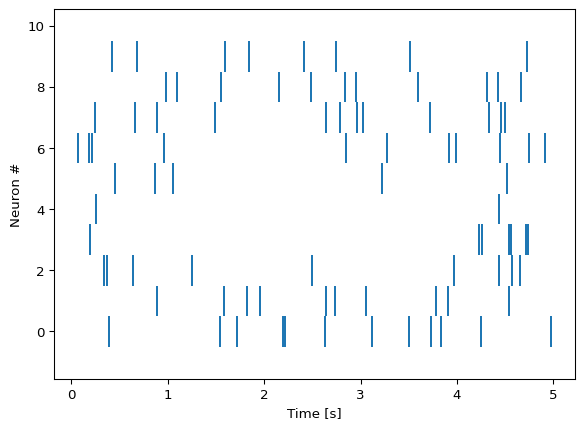

<span class="theorem-title">**Exercise 8**</span> Generate 50 spike
trains from the simulated neuron. Then, extract the spike `.times` for
each spike train and visualize them in an `eventplot`.

``` python
sts = neuron.generate_n_spiketrains(50)
spike_times = [st.times for st in sts]
plt.eventplot(spike_times)
plt.xlabel("Time [s]")
plt.ylabel("Neuron #")
```

    Text(0, 0.5, 'Neuron #')

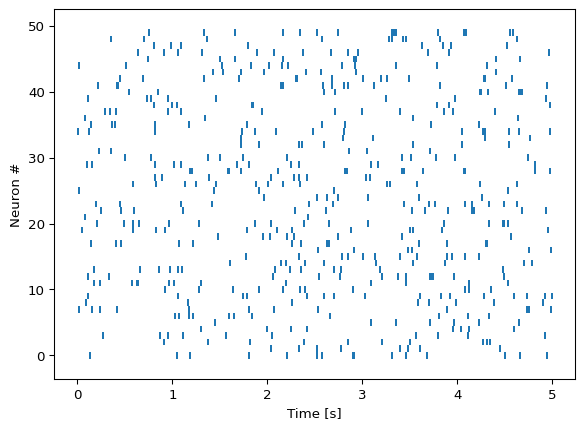

<span class="theorem-title">**Exercise 9**</span> Generate 1000 spike
trains from the simulated neuron. Then, extract the spike `.times` for
each spike train and visualize them in an `eventplot`.

``` python
sts = neuron.generate_n_spiketrains(1000)
spike_times = [st.times for st in sts]
plt.eventplot(spike_times)
plt.xlabel("Time [s]")
plt.ylabel("Neuron #")
```

    Text(0, 0.5, 'Neuron #')

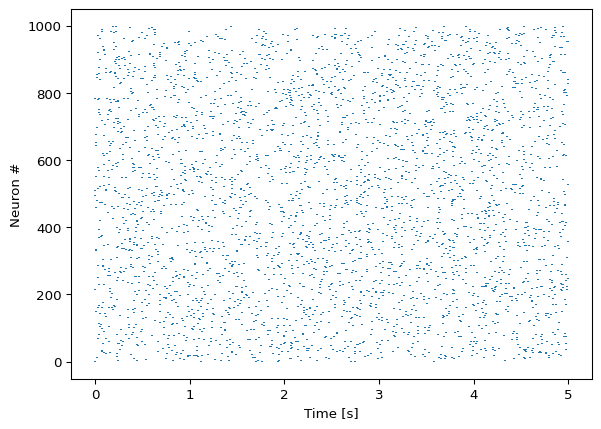

<span class="theorem-title">**Exercise 10**</span> Simulate a neuron as
a `StationaryPoissonProcess` with a `rate` of **0.1 Hz** that lasts **1
s**. Then, generate **1000** spike trains from that neuron. Then,
extract the spike `.times` for each spike train and visualize them in an
`eventplot`.

``` python
rate = 0.1 * pq.Hz
t_stop = 1 * pq.s
neuron = StationaryPoissonProcess(rate=rate, t_stop=t_stop)
sts = neuron.generate_n_spiketrains(1000)
spike_times = [st.times for st in sts]
plt.eventplot(spike_times)
plt.xlabel("Time [s]")
plt.ylabel("Neuron #")
```

    Text(0, 0.5, 'Neuron #')

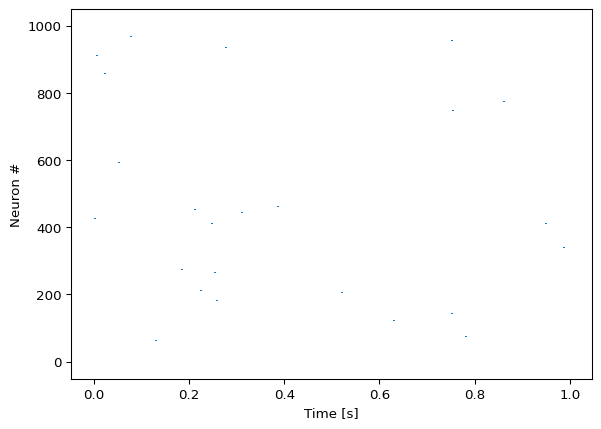

## 3 Comparing Theoretical and Empirical Poisson Distributions

| Code | Description |
|------------------------------------|------------------------------------|
| `n_spikes = [len(st) for st in sts]` | Get the number of spikes (i.e. the length) for each spike train `st` in the list `sts` |
| `plt.hist(x)` | Plot a histrogram of binned counts of `x` |
| `plt.hist(x, density=True)` | Plot a histrogram with the normalized probability density of the binned counts of `x` |
| `utils.plot_poisson_distribution(rate, duration, x_range)` | Plot the distribution for a Poisson process with a given `rate` and `duration` across the given `x_range` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 4**</span> Simulate a neuron as a
`StationaryPoissonProcess` with a `rate` of **1 Hz** that is active for
**10 s**. Then, generate **10** spike trains from that neuron and get
the number of spikes in each spike train (i.e. the `len()` of each spike
train). Print the average number of spikes per spike train.

``` python
neuron = StationaryPoissonProcess(rate=1*pq.Hz, t_stop=10*pq.s)
sts = neuron.generate_n_spiketrains(10)
n_spikes = [len(st) for st in sts]
np.mean(n_spikes)
```

    10.9

<span class="theorem-title">**Exercise 11**</span> Simulate a neuron as
a `StationaryPoissonProcess` with a `rate` of **2 Hz** that is active
for **5 s**. Then, generate **10** spike trains from that neuron and get
the number of spikes in each spike train (i.e. the `len()` of each spike
train). Print the average number of spikes per spike train. Rerun the
code a few times and observe the average number of spikes per train.

``` python
neuron = StationaryPoissonProcess(rate=2*pq.Hz, t_stop=5*pq.s)
sts = neuron.generate_n_spiketrains(10)
n_spikes = [len(st) for st in sts]
np.mean(n_spikes)
```

    10.6

<span class="theorem-title">**Exercise 12**</span> Generate **1000**
spike trains from the neuron simulated in
<a href="#exr-sim1" class="quarto-xref">Exercise 11</a> and compute the
average number of spikes per spike train. Rerun the code a few times and
observe the average number of spikes per train.

``` python
neuron = StationaryPoissonProcess(rate=2*pq.Hz, t_stop=5*pq.s)
sts = neuron.generate_n_spiketrains(1000)
n_spikes = [len(st) for st in sts]
np.mean(n_spikes)
```

    9.926

<span class="theorem-title">**Example 5**</span> Generate **50** spike
trains from the neuron simuated in
<a href="#exr-sim1" class="quarto-xref">Exercise 11</a> and get the
number of spikes for each spike train. Then, plot the observed
distribution of the number of spike trains as a histogram.

``` python
sts = neuron.generate_n_spiketrains(50)
n_spikes = [len(st) for st in sts]
plt.hist(n_spikes)
plt.xlabel("Number of Spikes")
plt.ylabel("Number of Observations")
```

    Text(0, 0.5, 'Number of Observations')

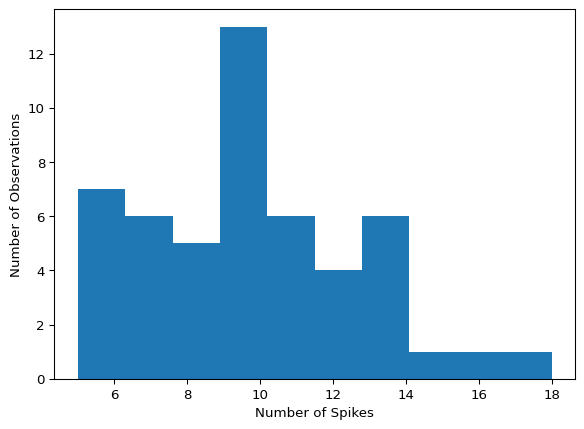

<span class="theorem-title">**Exercise 13**</span> Generate **1000**
spike trains from the neuron simuated in
<a href="#exr-sim1" class="quarto-xref">Exercise 11</a> and get the
number of spikes for each spike train. Then, plot the observed
distribution of the number of spike trains as a histogram. Increase the
number of bins (e.g. `bins=15`)

``` python
sts = neuron.generate_n_spiketrains(1000)
n_spikes = [len(st) for st in sts]
plt.hist(n_spikes)
plt.xlabel("Number of Spikes")
plt.ylabel("Number of Observations")
```

    Text(0, 0.5, 'Number of Observations')

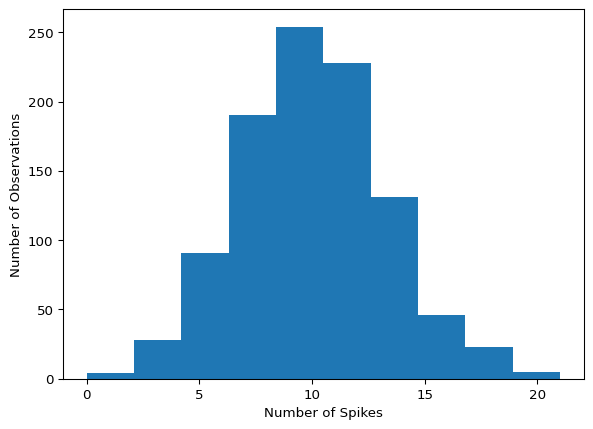

<span class="theorem-title">**Exercise 14**</span> Repeat the code from
<a href="#exr-hist" class="quarto-xref">Exercise 13</a> but add the
argument `denisty=True` when plotting the histogram to plot the
normalized `"Probability Density"` of observing a given number of
spikes.

``` python
sts = neuron.generate_n_spiketrains(1000)
n_spikes = [len(st) for st in sts]
plt.hist(n_spikes, density=True)
plt.xlabel("Number of Spikes")
plt.ylabel("Probability Density")
```

    Text(0, 0.5, 'Probability Density')

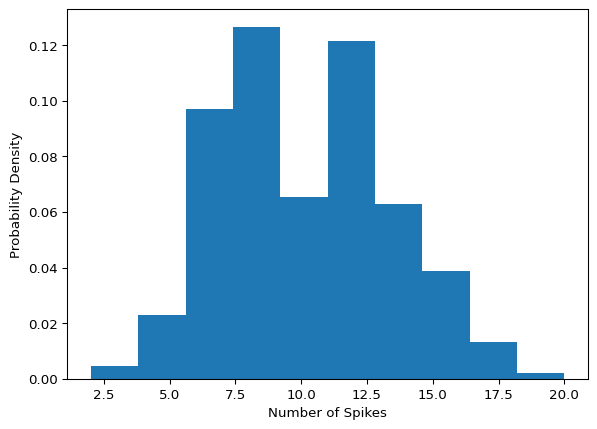

<span class="theorem-title">**Exercise 15**</span> Generate **50** spike
trains from the neuron simuated in
<a href="#exr-sim1" class="quarto-xref">Exercise 11</a> and plot a
histogram with the probability `density` of the observed spike train
counts. Then, generate **1000** spike trains from the same neuron and
plot the probability `density` of the observed spike train counts **in
the same plot**. When plotting the histrograms, set `alpha=0.5` to make
the bars transparent

and visualize the normalized density of the observed spike counts. Then,
generate **1000** spike trains from the same neuron and visualize the
normalized density of the observed spike counts in the same plot (HINT:
in the `plt.bar()` function, set `alpha=0.5` to make the bars
transparent).

``` python
sts = neuron.generate_n_spiketrains(50)
n_spikes = [len(st) for st in sts]
plt.hist(n_spikes, density=True, alpha=0.5)

sts = neuron.generate_n_spiketrains(1000)
n_spikes = [len(st) for st in sts]
plt.hist(n_spikes, density=True, alpha=0.5)

plt.xlabel("Spike Count")
plt.ylabel("Count")
```

    Text(0, 0.5, 'Count')

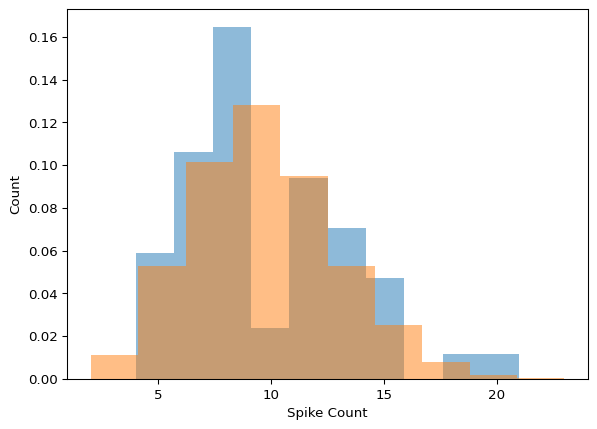

<span class="theorem-title">**Example 6**</span> Plot the theoretical
Poisson distribution for observing between **0 and 5** spikes in a
neuron with a `rate` of **0.5 Hz** that is active for **3 s**.

``` python
neuron = StationaryPoissonProcess(rate=0.5 * pq.Hz, t_stop=3 * pq.s)
utils.plot_poisson_distribution(
    rate=neuron.rate, duration=neuron.t_stop, x_range=(0, 5)
)
```

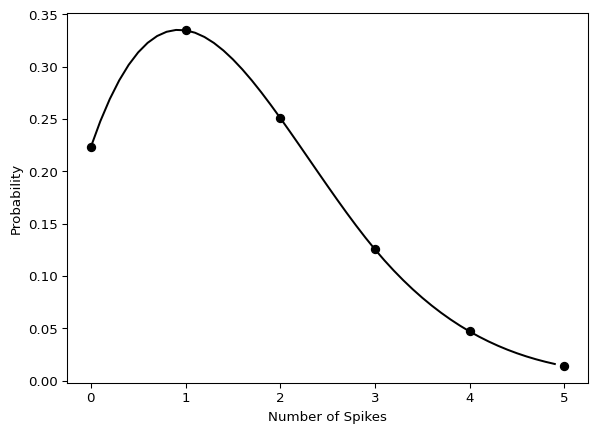

<span class="theorem-title">**Exercise 16**</span> Plot the theoretical
Poisson distribution for observing between **0 and 20** spikes in a
neuron with a `rate` of **2 Hz** that is active for **4 s**.

``` python
neuron = StationaryPoissonProcess(rate=2 * pq.Hz, t_stop=4 * pq.s)
utils.plot_poisson_distribution(
    rate=neuron.rate, duration=neuron.t_stop, x_range=(0, 20)
)
```

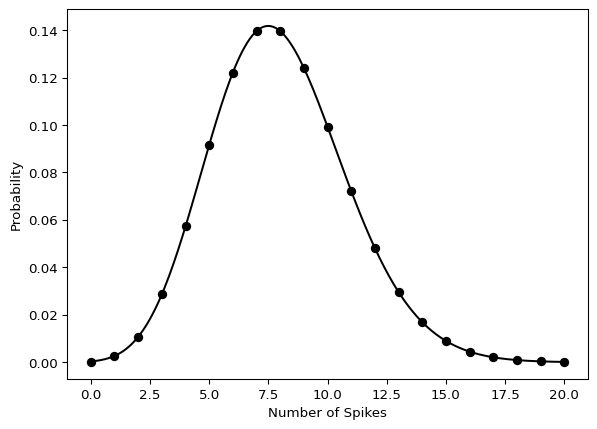

<span class="theorem-title">**Exercise 17**</span> Plot the theoretical
Poisson distribution for observing a given number of spikes in a neuron
with a `rate` of **10 Hz** that is active for **2.5 s**. Determine a
suitable `range` for the plot.

``` python
neuron = StationaryPoissonProcess(rate=10 * pq.Hz, t_stop=2.5 * pq.s)
utils.plot_poisson_distribution(
    rate=neuron.rate, duration=neuron.t_stop, x_range=(10, 40)
)
```

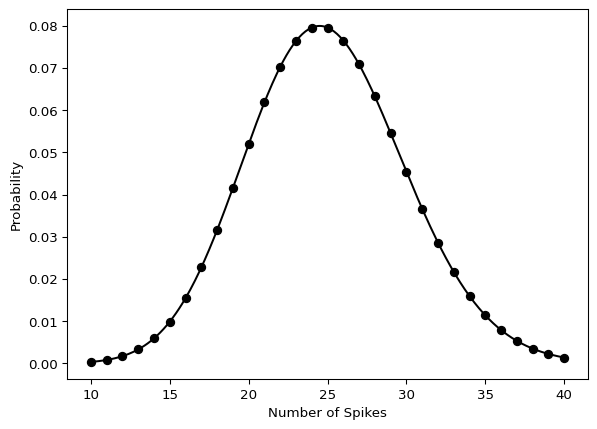

<span class="theorem-title">**Exercise 18**</span> Plot the theoretical
Poisson distribution for observing a given number of spikes in a neuron
with a `rate` of **5 Hz** that is active for **10 s**. Then, Generate
**50** spike trains from this neuron and plot a histogram with the
probability `density` of the observed spike train counts **in the same
plot**.

``` python
neuron = StationaryPoissonProcess(rate=5 * pq.Hz, t_stop=10 * pq.s)
sts = neuron.generate_n_spiketrains(50)
n_spikes = [len(st) for st in sts]
utils.plot_poisson_distribution(
    rate=neuron.rate, duration=neuron.t_stop, x_range=(30, 80)
)
plt.hist(n_spikes, density=True)
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
```

    Text(0, 0.5, 'Probability')

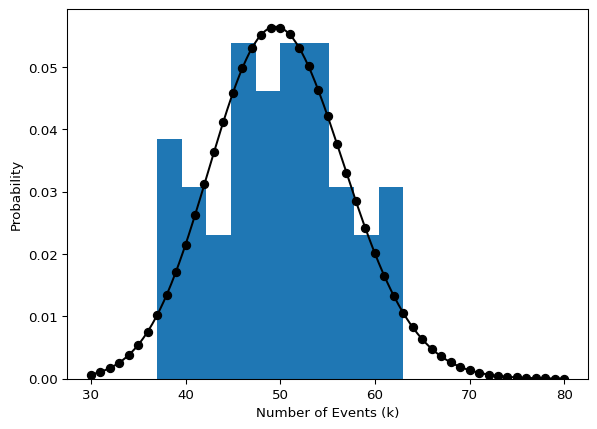

<span class="theorem-title">**Exercise 19**</span> Repeat the code frm
<a href="#exr-joint" class="quarto-xref">Exercise 18</a> but change the
number of generated spike trains to **1000**

``` python
neuron = StationaryPoissonProcess(rate=5 * pq.Hz, t_stop=10 * pq.s)
sts = neuron.generate_n_spiketrains(1000)
n_spikes = [len(st) for st in sts]
utils.plot_poisson_distribution(
    rate=neuron.rate, duration=neuron.t_stop, x_range=(30, 80)
)
plt.hist(n_spikes, density=True)
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
```

    Text(0, 0.5, 'Probability')

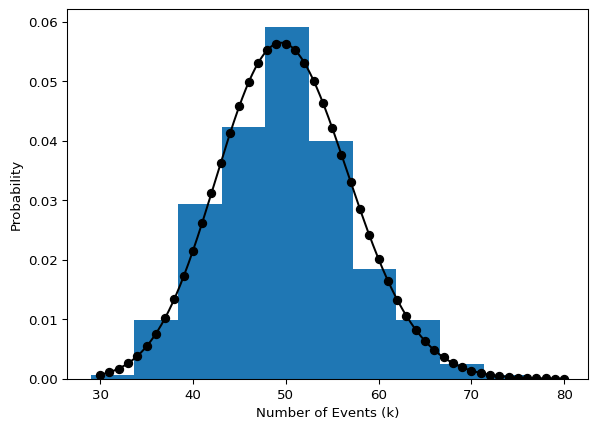

## 4 Inter-Spike Intervals (ISIs) and the Coefficient of Variation (CV)

| Code | Description |
|------------------------------------|------------------------------------|
| `isis = isi(st)` | Compute the inter-spike intervals (ISIs) for the spikes in a spike train `st` |
| `cv = isis.std()/isis.mean()` | Compute the coefficient of variation by dividing the `.std()` of the ISIs by their `.mean()` |
| `utils.plot_exponential_distribution(rate, x_range)` | Plot an exponential distribution for the ISIs of a Poisson neuron with a given `rate` across the given `x_range` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 20**</span> Compute the
inter-spike intervals for the spike train `st` generated below using the
`isi()` function and compute the mean intr-spike interval. What is the
relationship between the mean ISI and the neuron’s `rate`?

``` python
neuron = StationaryPoissonProcess(rate=3 * pq.Hz, t_stop=60 * pq.s)
st = neuron.generate_spiketrain()
```

``` python
isis = isi(st)
isis.mean()
```

    array(0.40129876) * s

<span class="theorem-title">**Exercise 21**</span> Compute the
inter-spike intervals for the spike train `st` generated below. What
value would you expect for the average inter-spike interval? Compute the
average ISI.

``` python
neuron = StationaryPoissonProcess(rate=10 * pq.Hz, t_stop=60 * pq.s)
st = neuron.generate_spiketrain()
```

``` python
isis = isi(st)
isis.mean()
```

    array(0.10216621) * s

<span class="theorem-title">**Example 7**</span> Compute the inter-spike
intervals for the spike train `st` and plot a histrogram with the
probability densities of the observed ISIs. Add the theoretical
exponential distribution for the ISIs given the neuron’s `.rate` in the
`x_range` between **0 and 3 s**.

``` python
neuron = StationaryPoissonProcess(rate=2.5 * pq.Hz, t_stop=10 * pq.s)
st = neuron.generate_spiketrain()
isis = isi(st)

plt.hist(isis.magnitude, density=True)
utils.plot_exponential_distribution(neuron.rate, x_range=(0, 3))
```

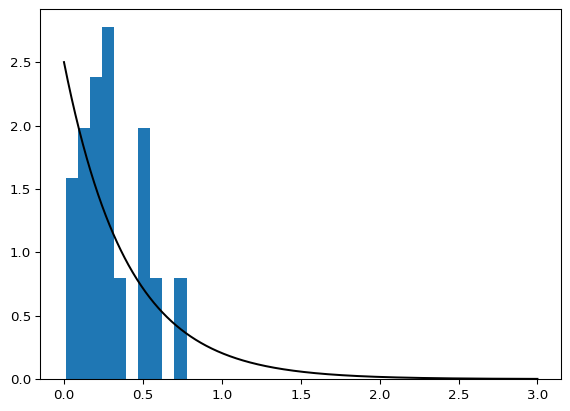

<span class="theorem-title">**Exercise 22**</span> Compute the
inter-spike intervals for the spike train `st` defined below and plot a
histrogram with the probability densities of the observed ISIs. Add the
theoretical exponential distribution for the ISIs given the neuron’s
`.rate` in a suitable `x_range`.

``` python
neuron = StationaryPoissonProcess(rate=0.5 * pq.Hz, t_stop=30 * pq.s)
st = neuron.generate_spiketrain()
```

``` python
isis = isi(st)
plt.hist(isis.magnitude, density=True)
utils.plot_exponential_distribution(neuron.rate, x_range=(0, 10))
```

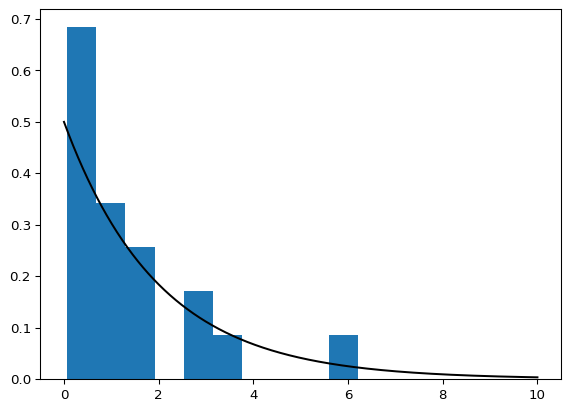

<span class="theorem-title">**Exercise 23**</span> Repeat the code from
<a href="#exr-isi" class="quarto-xref">Exercise 22</a> but change
`t_stop` to **1000 s**.

``` python
neuron = StationaryPoissonProcess(rate=0.5 * pq.Hz, t_stop=1000 * pq.s)
st = neuron.generate_spiketrain()
isis = isi(st)
plt.hist(isis.magnitude, density=True)
utils.plot_exponential_distribution(neuron.rate, x_range=(0, 10))
```

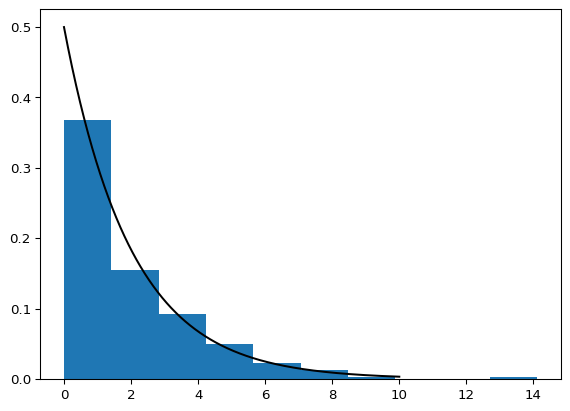

<span class="theorem-title">**Example 8**</span> Compute the coefficient
of variation (`cv`) by dividing the standard deviation of inter spike
intervals from the spike train `st` by their mean.

``` python
isis = isi(st)
cv = isis.std()/isis.mean()
cv
```

    array(0.98322932) * dimensionless

<span class="theorem-title">**Example 9**</span> Compute the `cvs` for
the list of spike trains `sts`.

``` python
neuron = StationaryPoissonProcess(rate=0.5 * pq.Hz, t_stop=10 * pq.s)
sts = neuron.generate_n_spiketrains(10)
isis = [isi(st) for st in sts]
cvs = [i.std() / i.mean() for i in isis]
cvs
```

    [array(1.81098136) * dimensionless,
     array(0.07968333) * dimensionless,
     array(1.02572743) * dimensionless,
     array(0.99262174) * dimensionless,
     array(0.8772788) * dimensionless,
     array(0.78433139) * dimensionless,
     array(0.70004771) * dimensionless,
     array(0.72199144) * dimensionless,
     array(0.10030712) * dimensionless,
     array(0.90691295) * dimensionless]

<span class="theorem-title">**Exercise 24**</span> Compute the `cvs` for
the list of spike trains `sts` generated below and visualize them in a
histogram

``` python
neuron = StationaryPoissonProcess(rate=5 * pq.Hz, t_stop=20 * pq.s)
sts = neuron.generate_n_spiketrains(10)
```

``` python
isis = [isi(st) for st in sts]
cvs = [i.std() / i.mean() for i in isis]
plt.hist(cvs)
```

    (array([1., 0., 0., 0., 2., 0., 2., 1., 2., 2.]),
     array([0.78837195, 0.82007319, 0.85177444, 0.88347568, 0.91517692,
            0.94687817, 0.97857941, 1.01028065, 1.04198189, 1.07368314,
            1.10538438]),
     <BarContainer object of 10 artists>)

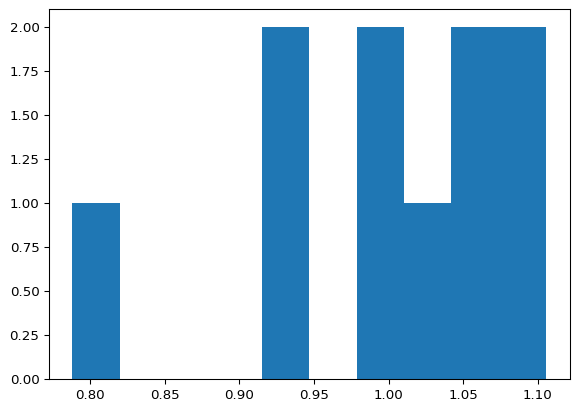

<span class="theorem-title">**Exercise 25**</span> Repeat the code from
<a href="#exr-cv2" class="quarto-xref">Exercise 24</a> but generate
**1000** spike trains from the simulated neuron. What is the average CV
across all spiketrains?

``` python
neuron = StationaryPoissonProcess(rate=5 * pq.Hz, t_stop=20 * pq.s)
sts = neuron.generate_n_spiketrains(1000)
isis = [isi(st) for st in sts]
cvs = [i.std() / i.mean() for i in isis]
plt.hist(cvs)
np.mean(cvs)
```

    0.9872159574934591

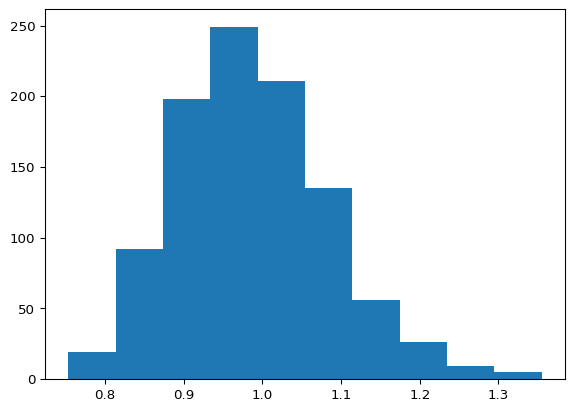

<span class="theorem-title">**Exercise 26**</span> Repeat the code from
<a href="#exr-cv2" class="quarto-xref">Exercise 24</a> but set the
neuron’s `t_stop` to **600 s**. How does this affect the range of the
histogram’s x-axis?

(array([  8.,  57., 148., 275., 255., 167.,  56.,  27.,   4.,   3.]),
 array([0.86811621, 0.89955733, 0.93099845, 0.96243956, 0.99388068,
        1.0253218 , 1.05676292, 1.08820404, 1.11964516, 1.15108628,
        1.18252739]),
 <BarContainer object of 10 artists>)

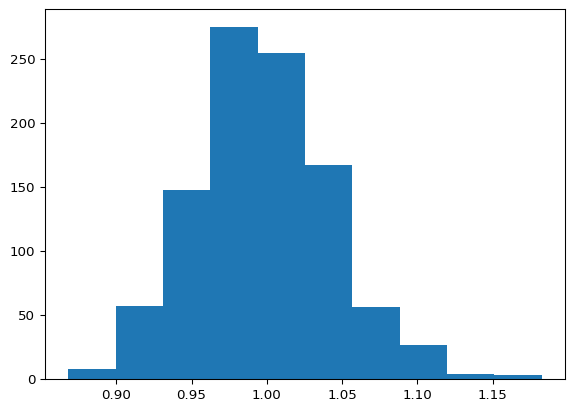

In [42]:
neuron = StationaryPoissonProcess(rate=0.8 * pq.Hz, t_stop=600 * pq.s)
sts = neuron.generate_n_spiketrains(1000)
isis = [isi(st) for st in sts]
cvs = [i.std() / i.mean() for i in isis]
plt.hist(cvs)

<span class="theorem-title">**Exercise 27**</span> Compute the `cvs` for
the list of spike trains `sts` generated below from a neuron with a
`refractory_period` of **2 ms**, visualize them in a histogram and
compute the average CV across all spiketrains. How did introducting a
refractory period affect the distribution of CVs?

``` python
neuron = StationaryPoissonProcess(
    rate=0.8 * pq.Hz, t_stop=20 * pq.s, refractory_period=2 * pq.ms
)
sts = neuron.generate_n_spiketrains(1000)
```

``` python
isis = [isi(st) for st in sts]
cvs = [i.std() / i.mean() for i in isis]
plt.hist(cvs)
np.mean(cvs)
```

    0.9084913207030636

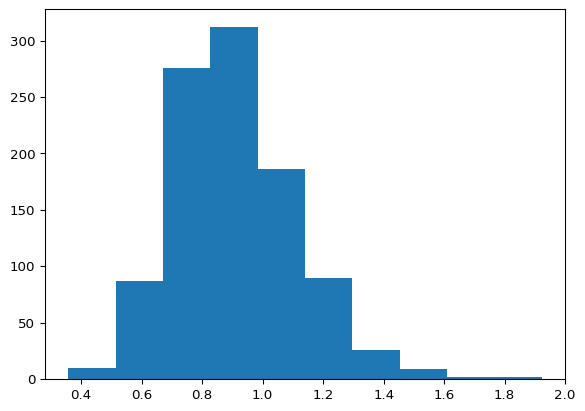

<span class="theorem-title">**Exercise 28**</span> How would you expect
the distribution of CVs to change if the `refractory_period` was
increased? Try repeating the code from
<a href="#exr-ref" class="quarto-xref">Exercise 27</a> while increasing
the `refractory_period` (you may try out extreme, physiologically
implausible values).

``` python
neuron = StationaryPoissonProcess(
    rate=0.8 * pq.Hz, t_stop=20 * pq.s, refractory_period=500 * pq.ms
)
sts = neuron.generate_n_spiketrains(1000)
isis = [isi(st) for st in sts]
cvs = [i.std() / i.mean() for i in isis]
plt.hist(cvs)
np.mean(cvs)
```

    0.5312938644310625

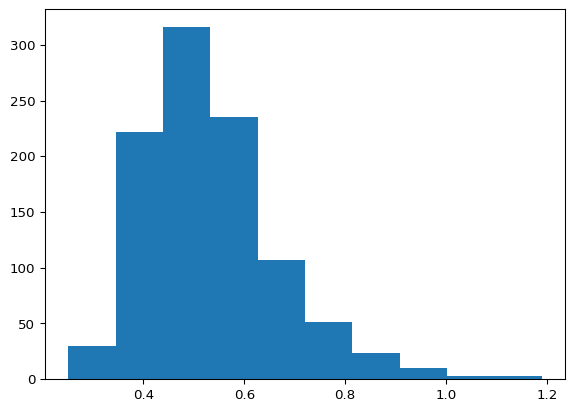